Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [97]:
# Importación del data frame
raw_df = pd.read_csv('DelayedFlights.csv', encoding = 'utf-8', index_col = 0 )

In [98]:
raw_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [99]:
# Se eliminan datos categóricos
df = raw_df.drop(columns=['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'])

In [100]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,1631,127.0,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,1631,162.0,...,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,...,533,13.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN


In [101]:
# Se eliminan las entradas NaN
df.dropna(inplace=True)

In [102]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,509,240.0,...,1591,3.0,7.0,0,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,1333,121.0,...,828,6.0,8.0,0,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,675,228.0,...,1489,7.0,8.0,0,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,4,123.0,...,838,4.0,9.0,0,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009705,2008,12,13,6,921.0,830,1112.0,1008,1616,111.0,...,545,8.0,21.0,0,0,51.0,0.0,13.0,0.0,0.0
7009709,2008,12,13,6,1552.0,1520,1735.0,1718,1620,43.0,...,151,9.0,7.0,0,0,0.0,0.0,0.0,0.0,17.0
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,1631,127.0,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0


In [103]:
# Normalización de datos 
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [104]:
data_scaled

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.346115,0.000172,0.000517,0.000689,0.315261,0.302506,0.337669,0.331808,0.675683,0.015513,...,0.088770,0.000517,0.001724,0.0,0.0,0.000345,0.000000,0.000000,0.0,0.005516
1,0.427918,0.000213,0.000639,0.000852,0.412788,0.389985,0.434099,0.413427,0.108471,0.051146,...,0.339053,0.000639,0.001492,0.0,0.0,0.002131,0.000000,0.000000,0.0,0.010016
2,0.474320,0.000236,0.000709,0.000945,0.388337,0.356685,0.435817,0.407471,0.314875,0.028582,...,0.195586,0.001417,0.001890,0.0,0.0,0.001890,0.000000,0.000000,0.0,0.017007
3,0.496899,0.000247,0.000742,0.000990,0.359312,0.352630,0.405834,0.402122,0.167035,0.056421,...,0.368468,0.001732,0.001980,0.0,0.0,0.000742,0.000000,0.000000,0.0,0.002970
4,0.563119,0.000280,0.000841,0.001122,0.371019,0.351949,0.427948,0.423461,0.001122,0.034494,...,0.235007,0.001122,0.002524,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.004487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247483,0.611886,0.003657,0.003961,0.001828,0.280651,0.252921,0.338853,0.307162,0.492434,0.033824,...,0.166075,0.002438,0.006399,0.0,0.0,0.015541,0.000000,0.003961,0.0,0.000000
1247484,0.481822,0.002879,0.003119,0.001440,0.372405,0.364726,0.416316,0.412237,0.388721,0.010318,...,0.036233,0.002160,0.001680,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.004079
1247485,0.508123,0.003037,0.003290,0.001518,0.316312,0.308720,0.409181,0.392732,0.410193,0.037198,...,0.229263,0.002277,0.004555,0.0,0.0,0.000759,0.000000,0.000000,0.0,0.005567
1247486,0.664125,0.003969,0.004300,0.001984,0.217296,0.198444,0.298988,0.247724,0.539436,0.042004,...,0.159086,0.004961,0.011245,0.0,0.0,0.000000,0.018852,0.005953,0.0,0.000000


In [105]:
# Limitación de muestras por motivos de rendimiento del equipo utilizado
df = data_scaled[ :10000]

In [106]:
df = df[['FlightNum', 'CRSArrTime']]

In [107]:
df

,FlightNum,CRSArrTime
0,0.675683,0.331808
1,0.108471,0.413427
2,0.314875,0.407471
3,0.167035,0.402122
4,0.001122,0.423461
...,...,...
9995,0.388244,0.410936
9996,0.347309,0.435082
9997,0.139540,0.450415
9998,0.512760,0.396537


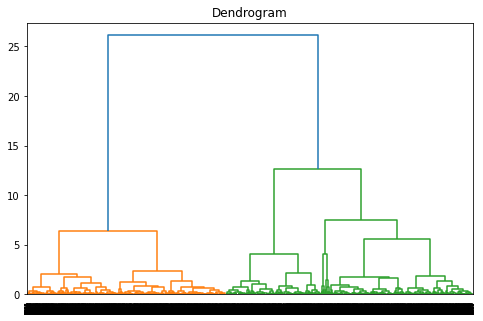

In [108]:
# Se crea un dendograma para encontrar el número optimo de clústers 
# mediante aglomeración jerárquica
plt.figure(figsize=(8, 5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

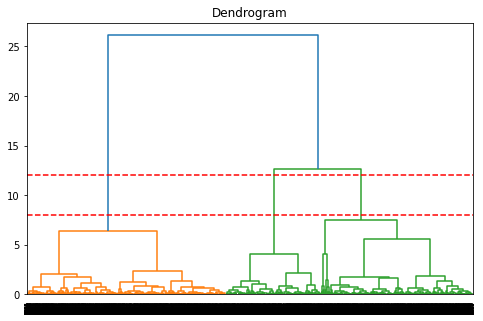

In [109]:
# Se marca en el gráfico la cantidad de clústers que se usara finalmente. Se cuenta las lineas verticales
# que atraviesan la zona delimitada
plt.figure(figsize=(8, 5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=12, color='r', linestyle='--')
plt.axhline(y=8, color='r', linestyle='--')

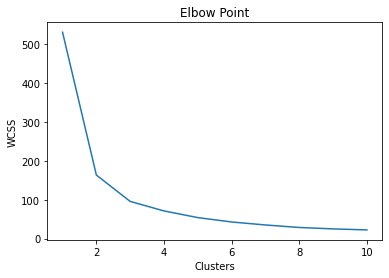

In [110]:
df = np.array(df.loc[:,['FlightNum',                
                       'CRSArrTime']])    \
                        .reshape(-1, 2)

# Una segunda opción para encontrar el punto de inflexión o "Elbow point" para determinar el número de clústers
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 
                    max_iter = 300,                      
                    n_init = 1000,                         
                    random_state = 0)                  
    model.fit(df)                              
    wcss.append(model.inertia_)
    
# Plot del gráfico "Elbow Point"
plt.plot(range(1, 11), wcss)
plt.title('Elbow Point')                               
plt.xlabel('Clusters')                       
plt.ylabel('WCSS')      
plt.show()

### Nivell 1

**- Exercici 1:**

Agrupa els diferents vols utilitzant l'algorisme de K-means.

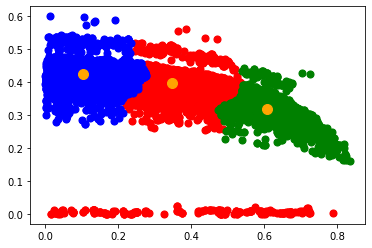

In [111]:
kmeans = KMeans(n_clusters = 3,                 
                init = 'random',             
                max_iter = 300,                 
                n_init = 10,                    
                random_state = 0)               

label = kmeans.fit_predict(df)

# Plot the data
plt.scatter(df[:,0], 
            df[:,1])

# Plot the clusters
plt.scatter(df[labels==0, 0], df[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(df[labels==1, 0], df[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(df[labels==2, 0], df[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='orange')                           # Set centroid color
plt.show()

In [112]:
#Predicción de los clústers.
print(label)

[0 2 1 ... 2 0 0]


In [113]:
#Unique labels
u_labels = np.unique(label)
 
# Grafica del resultado
u_labels

array([0, 1, 2], dtype=int32)

### Nivell 2

**- Exercici 2:**

Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

### Nivell 3

**- Exercici 3:**

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.